# Audio preprocessing 

In [60]:
from comet_ml import Experiment
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [31]:
import sklearn

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

In [21]:
# Import Comet for experiment tracking and visual tools
audio_path = 'C:\\Users\mosta\Desktop\Training_Data\human\human_00000.wav'

In [22]:
samplerate, data = wav.read(audio_path)

In [23]:
print(samplerate), print(data)

16000
[-14 -13 -37 ...  15  12  14]


(None, None)

In [24]:
data.shape

(78240,)

In [25]:
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [26]:
librosa.load(audio_path, sr=44100)

(array([-0.00042648, -0.00046566, -0.00042165, ...,  0.00042431,
         0.00032663,  0.00016905], dtype=float32),
 44100)

In [27]:
ipd.Audio(audio_path)

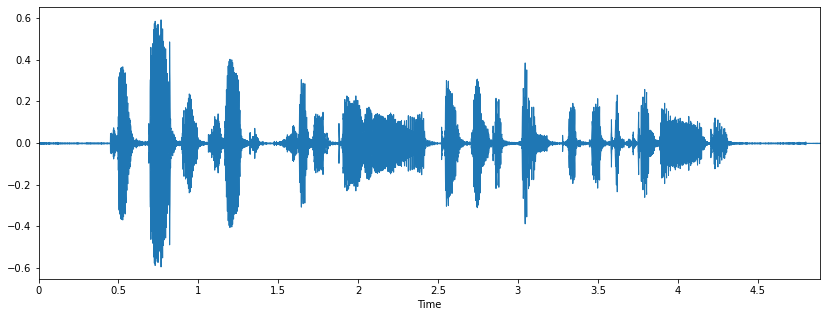

In [28]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

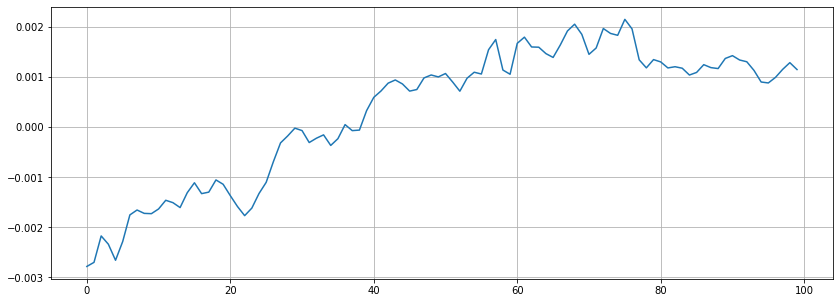

In [29]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [30]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

3


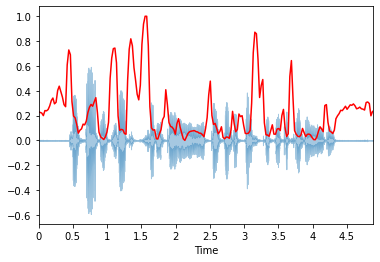

In [32]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

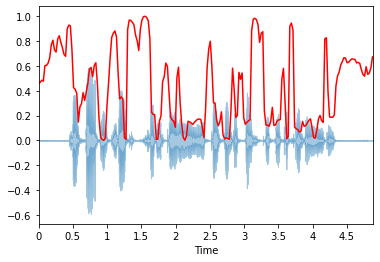

In [33]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 211)


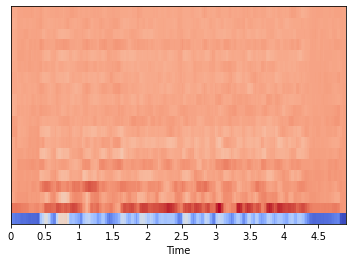

In [34]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [35]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [36]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [45]:
import csv
import os 

In [52]:
with open('data.csv', 'wb') as csvfile:
     filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'human spoof'.split()
for g in genres:
    for filename in os.listdir(f'Training_Data/{g}'):
        songname = f'Training_Data/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

C:\Users\mosta\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [56]:
data = pd.read_csv('data.csv')
data

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,human_00000.wav,0.353022,0.042762,1698.311629,1708.273546,3365.404926,0.087067,-368.347534,113.735191,12.970051,...,-4.520185,-4.032321,-8.738158,-4.378027,-13.430144,4.926398,-7.972149,-5.450689,-2.770082,human
1,human_00001.wav,0.479716,0.003636,1553.135885,1514.208772,2904.209206,0.067834,-562.947815,121.397758,-18.131918,...,8.148829,11.660575,-4.594286,14.093515,-1.010832,7.608934,2.417472,12.535056,2.939179,human
2,human_00002.wav,0.345533,0.059232,1458.539398,1590.756452,2949.948674,0.062064,-348.697754,116.993080,6.470922,...,-0.932909,-4.581821,1.384029,1.174273,-5.940724,2.146938,-7.342173,-3.320397,-2.511549,human
3,human_00003.wav,0.312623,0.004049,2377.953299,1805.998107,4344.411981,0.161133,-538.822083,85.091072,-46.547985,...,-12.554141,-3.270665,-10.091649,2.089070,-10.832203,-0.316745,-10.121891,-2.006852,-9.425464,human
4,human_00004.wav,0.397256,0.014278,1932.324862,1383.286507,3284.746582,0.138356,-426.593384,125.052292,-51.205925,...,-4.455950,-0.867689,-8.473681,4.679374,-8.171278,-0.674228,-3.593828,-2.961659,-3.126526,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,spoof_39673.wav,0.336658,0.069294,1756.190172,1022.229669,2729.413844,0.147448,-314.551514,129.409500,-90.269630,...,-14.764008,-1.159425,4.006265,5.080279,5.698768,-9.548800,-6.992628,5.348775,4.741798,spoof
49996,spoof_39674.wav,0.288208,0.056462,1840.526877,1403.591770,3303.808594,0.119391,-357.329193,65.542542,-20.765537,...,-13.490705,-3.255477,-11.108831,-2.680232,-8.582980,-4.195746,-6.818244,-1.406170,-3.929863,spoof
49997,spoof_39675.wav,0.441185,0.027787,1866.687096,1667.371912,3494.251598,0.097878,-407.410400,81.120544,-25.251736,...,-1.518725,5.736842,-0.096626,8.997629,-1.876797,5.744322,-0.450220,0.017894,-1.882801,spoof
49998,spoof_39676.wav,0.307151,0.117988,1047.621227,1323.985635,2093.599319,0.044819,-257.948669,145.920364,-3.819135,...,-3.842176,-2.345258,-5.333961,4.571630,-5.065241,-3.432592,-4.478631,-3.064152,-8.729668,spoof


In [57]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.353022,0.042762,1698.311629,1708.273546,3365.404926,0.087067,-368.347534,113.735191,12.970051,40.070858,...,-4.520185,-4.032321,-8.738158,-4.378027,-13.430144,4.926398,-7.972149,-5.450689,-2.770082,human
1,0.479716,0.003636,1553.135885,1514.208772,2904.209206,0.067834,-562.947815,121.397758,-18.131918,59.678673,...,8.148829,11.660575,-4.594286,14.093515,-1.010832,7.608934,2.417472,12.535056,2.939179,human
2,0.345533,0.059232,1458.539398,1590.756452,2949.948674,0.062064,-348.697754,116.993080,6.470922,43.426426,...,-0.932909,-4.581821,1.384029,1.174273,-5.940724,2.146938,-7.342173,-3.320397,-2.511549,human
3,0.312623,0.004049,2377.953299,1805.998107,4344.411981,0.161133,-538.822083,85.091072,-46.547985,47.947906,...,-12.554141,-3.270665,-10.091649,2.089070,-10.832203,-0.316745,-10.121891,-2.006852,-9.425464,human
4,0.397256,0.014278,1932.324862,1383.286507,3284.746582,0.138356,-426.593384,125.052292,-51.205925,9.053070,...,-4.455950,-0.867689,-8.473681,4.679374,-8.171278,-0.674228,-3.593828,-2.961659,-3.126526,human


In [58]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 ... 1 1 1]


In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [64]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 0.2808 - accuracy: 0.8978
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1395 - accuracy: 0.9487
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9616
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9680
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9736
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9772
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0529 - accuracy: 0.9807
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9842
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9864
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0339 - accuracy: 0.9882

In [66]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9792
test_acc:  0.979200005531311


In [67]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

1